#**Load The Dataset**

In [6]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#**Basic Data Understanding**

In [7]:
# Check the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# See column names
print("Columns:", df.columns)

# Preview first 5 rows
df.head()


Dataset shape: (50000, 2)
Columns: Index(['review', 'sentiment'], dtype='object')


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
# Count how many positive and negative reviews
df['sentiment'].value_counts()


,count
sentiment,
positive,25000
negative,25000


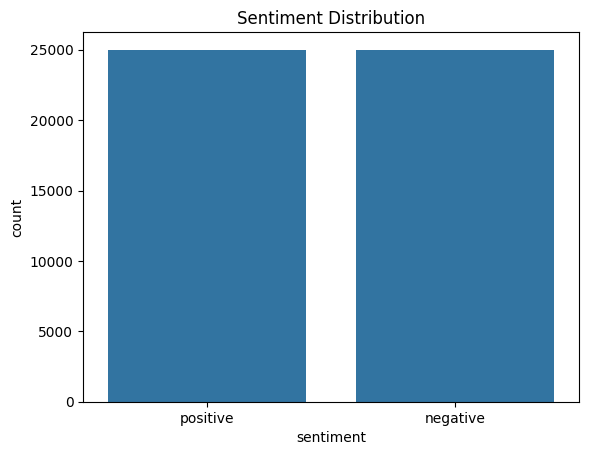

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


#**Text Cleaning**

In [10]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([ch for ch in text if ch not in string.punctuation])

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)


In [12]:
df['cleaned_review'] = df['review'].apply(clean_text)

# Preview cleaned data
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


#**Feature Extraction with TF-IDF**

**1. TF-IDF Vectorization**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# use only the top 5000 most important words
tfidf = TfidfVectorizer(max_features=5000)

# Transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review']).toarray()


**2. Convert target labels into numbers**

In [15]:
# 1 for positive, 0 for negative
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
y = df['sentiment']


#**Train the Model & Evaluate**

**1. Split the data into training and testing**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**2. Train Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8881

Confusion Matrix:
 [[4337  624]
 [ 495 4544]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Naive Bayes**

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8525


In [20]:
def predict_sentiment(review_text):
    # Clean the input review (same as before)
    cleaned = clean_text(review_text)

    # Convert to TF-IDF vector
    vectorized = tfidf.transform([cleaned]).toarray()

    # Predict sentiment
    prediction = lr.predict(vectorized)

    # Map result
    sentiment = "Positive 😊" if prediction[0] == 1 else "Negative 😞"
    return sentiment

# Example: Try your own review!
user_input = input("Enter a movie review: ")
print("Predicted Sentiment:", predict_sentiment(user_input))


Enter a movie review: This movie was so boring and slow!
Predicted Sentiment: Negative 😞


#**Visualization**

**Word Frequency (Top words in positive & negative reviews)**

<ipython-input-19-de5cbd2b2e2a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=pos_df, ax=axs[0], palette='Greens_d')
<ipython-input-19-de5cbd2b2e2a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=neg_df, ax=axs[1], palette='Reds_d')


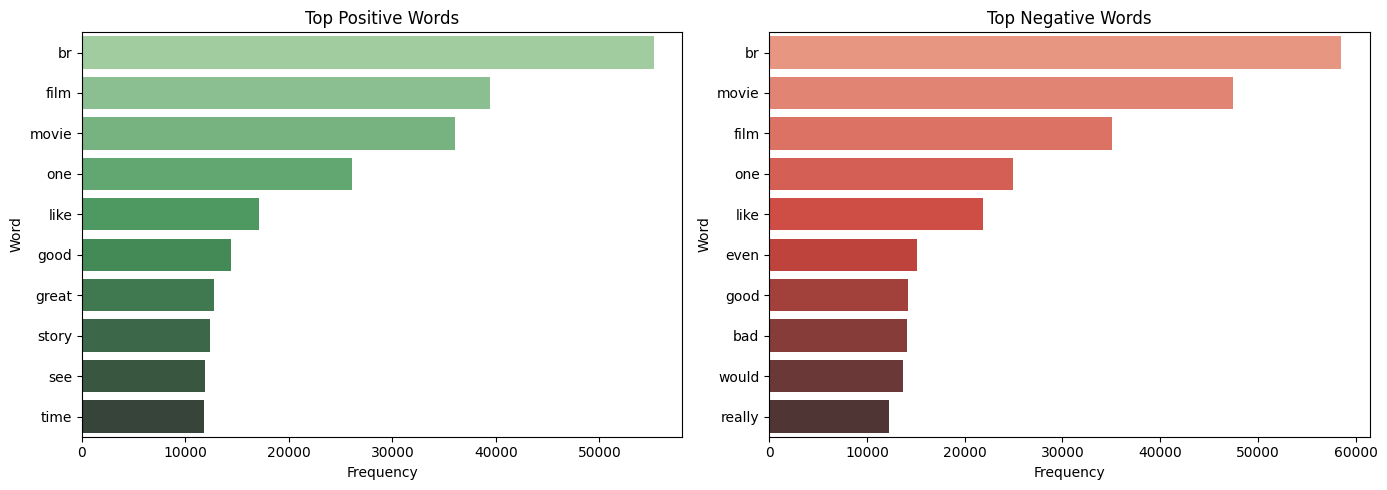

In [19]:
from collections import Counter

# Separate cleaned reviews
positive_reviews = df[df['sentiment'] == 1]['cleaned_review']
negative_reviews = df[df['sentiment'] == 0]['cleaned_review']

# Join all words
positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

# Top 10 most common words
pos_common = Counter(positive_words).most_common(10)
neg_common = Counter(negative_words).most_common(10)

# Convert to DataFrame for plotting
pos_df = pd.DataFrame(pos_common, columns=['Word', 'Frequency'])
neg_df = pd.DataFrame(neg_common, columns=['Word', 'Frequency'])

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='Frequency', y='Word', data=pos_df, ax=axs[0], palette='Greens_d')
axs[0].set_title('Top Positive Words')

sns.barplot(x='Frequency', y='Word', data=neg_df, ax=axs[1], palette='Reds_d')
axs[1].set_title('Top Negative Words')

plt.tight_layout()
plt.show()
